## Orbit Properties

This script can be used to compute analytically a variety of orbit properties. The script was developed for the NuAncestor Mission Analysis. The code includes in particular the relations between the orbit period, semi-major axis, number of overflights above groundstations and the required tracking speed. 

Version 23/02/2025 by Blanca Crazzolara

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [6]:
MU_E = 	3.986004418e5 # km^3/s^2

def prograde_T(n, per = 23): # n = contacts per 23.56h
    if (per < 24):
        T = 3600*(23+56./60) / (1+n) # [s]
    else:
        T = 3600*(23+56./60) / (1-n) # [s]
    return T

def retrograde_T(n):
    T = 3600*(23+56./60) / (n-1) # [s]
    return T

def period(A): # period [s]
    T = 2*np.pi* np.sqrt(A**3/MU_E)  # [s]
    return T

def A(T):
    A = (MU_E * (T/2/np.pi)**2)**(1./3) # [km]
    return A

def alt(A):
    return A - 6371 # [km]

def period_h(A):
    return period(A)/3600.
def A_h(T):
    T = T*3600.
    return A(T)

def n(a, direction = "prograde"): # n = contacts/23.56h
    T = period(a) # [s]
    if(direction == "prograde" or direction == "pro" or direction == "p"):
        if (T/3600 < 24):
            N = (23+56./60)*3600  / T - 1
        else:
            N = 1 - (23+56./60)*3600  / T
    else:
        N = (23+56./60)*3600  / T + 1
    return N


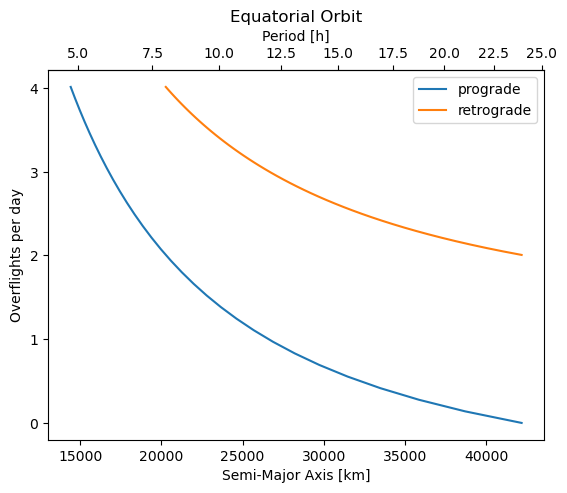

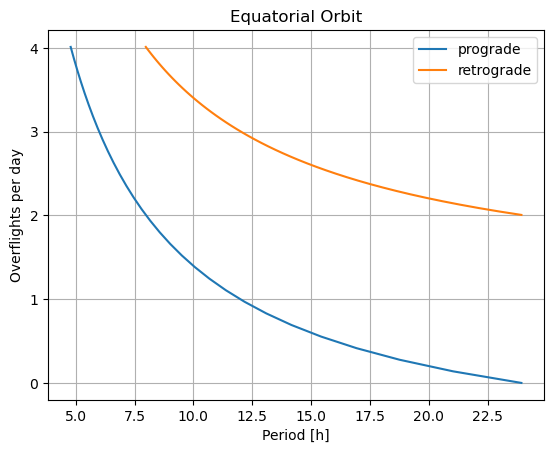

In [7]:
N_pro = np.linspace(0, 4, 30)
N_pro2 = np.linspace(0, 0.5, 20)
N_retro = np.linspace(2, 4, 50)


T_pro = prograde_T(N_pro)
T_pro2 = prograde_T(N_pro2, per = 25)
T_retro = retrograde_T(N_retro)

A_pro = A(T_pro)
A_pro2 = A(T_pro2)
A_retro = A(T_retro)

fig, ax = plt.subplots()
ax.plot(A_pro, N_pro/(23+56./60)*24, label = "prograde")
ax.plot(A_retro, N_retro/(23+56./60)*24, label = "retrograde")
ax.set_title("Equatorial Orbit")
plt.gca().set_yticks([0,1,2,3,4])
ax.set_xlabel("Semi-Major Axis [km]")
ax.set_ylabel("Overflights per day")
#ax.grid(True)
secax = ax.secondary_xaxis('top', functions=(period_h, A_h))
secax.set_xlabel('Period [h]')
plt.legend()
#plt.savefig("overflight_number_no_grid.png")



plt.figure()
plt.plot(T_pro/60/60, N_pro/(23+56./60)*24, label = "prograde")
plt.plot(T_retro/60/60, N_retro/(23+56./60)*24, label = "retrograde")
plt.title("Equatorial Orbit")
plt.gca().set_yticks([0,1,2,3,4])
plt.xlim(right = 24.9)
plt.xlabel("Period [h]")
plt.ylabel("Overflights per day")
plt.grid(True)
plt.legend()
#plt.savefig("overflight_number.png")

In [8]:
MU = 398600.44189 # km^3 / s^2
R_E = 6371 # [km]
Omega = 2*np.pi / (3600*(23 + 56/60) ) # rad/s

# Maximal tracking speed when satellite is at highest elevation point
def omega_max(a, lat, inc = 0): # [arcsec/s]
    d = np.sqrt(a**2 + R_E**2 - 2 * R_E*a*np.cos(lat))
    if(inc == 0):
        w_obs = np.abs(a / d *(Omega - np.sqrt(MU/a**3)))
    elif(inc == 180):
        w_obs = np.abs(a / d *(Omega + np.sqrt(MU/a**3)))
    else:
        print("error due to non-defined formula")
    return w_obs*648000/np.pi 

# Maximal azimuthal tracking speed when satellite is at highest elecvation point (diverges for lat = 0)
def omega_a_max(a, lat, inc = 0): # [arcsec/s]
    d = np.sqrt(a**2 + R_E**2 - 2 * R_E*a*np.cos(lat)) # km
    if(inc == 0):
        w_obs = 1./np.sin(lat) * np.abs(Omega - np.sqrt(MU/a**3)) # rad/s
    elif(inc == 180):
        w_obs = 1./np.sin(lat) * np.abs(Omega + np.sqrt(MU/a**3))
    else:
        print("error due to non-defined formula")
    return w_obs*648000/np.pi

# Maximal line of sight acceleration when satellite is at highest elevation point
def a_r_max(a, lat, inc = 0): # [km/s^2]
    d = np.sqrt(a**2 + R_E**2 - 2 * R_E*a*np.cos(lat))
    if(inc == 0):
        a_max = np.abs(a*R_E*np.cos(lat) / d * (Omega - np.sqrt(MU/a**3))**2 )
    elif(inc == 180):
        a_max = np.abs(a*R_E*np.cos(lat) / d * (Omega + np.sqrt(MU/a**3))**2 )
    else:
        print("error due to non-defined formula")
    return a_max



<>:80: SyntaxWarning: invalid escape sequence '\e'
<>:80: SyntaxWarning: invalid escape sequence '\e'
C:\Users\blanc\AppData\Local\Temp\ipykernel_22120\4266339053.py:80: SyntaxWarning: invalid escape sequence '\e'
  '''


'\nfor i in range(len(l_range)):\n    l = l_range[i]\n    for j in range(len(a_range)):   \n        w_range[j] = omega_obs(a_range[j], l, i = 180)\n    r = max(2*(L/2-i)/L,0)\n    g = 1\n    b = max(2*(0.5+i-L/2)/L,0)\n    #ax.plot(a_range, w_range, label = rf"$\\ell$ = {round(l/np.pi*180)}$\\degree$", color=(r, g, b))\n'

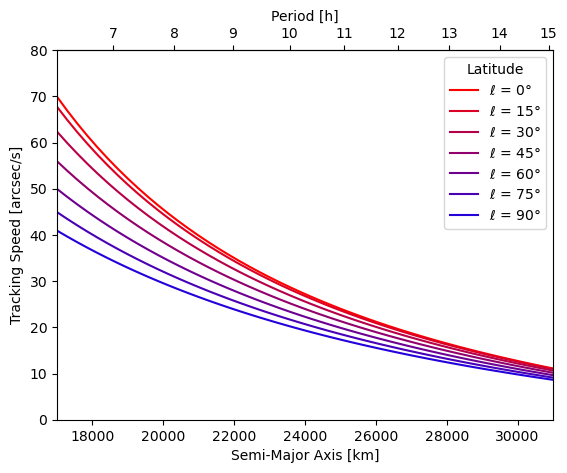

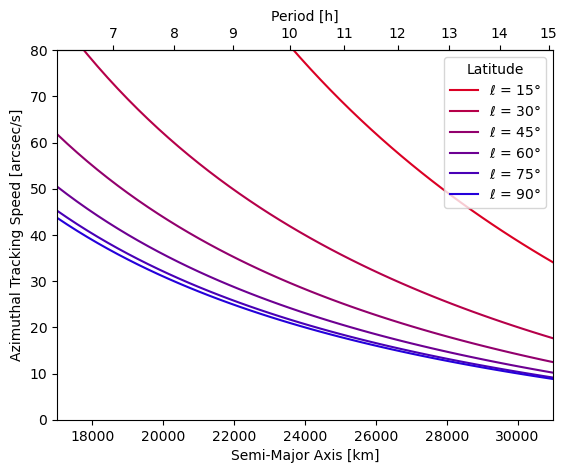

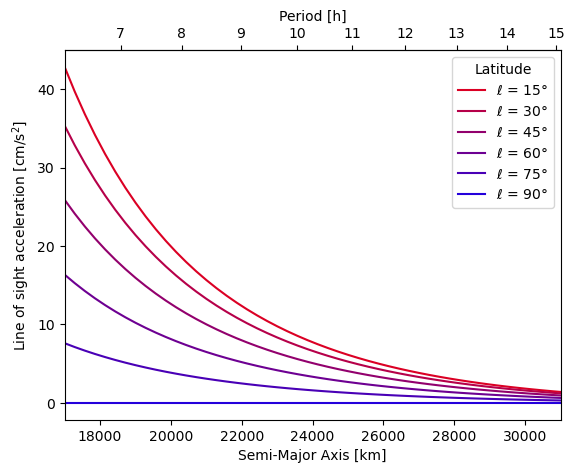

In [9]:

a_range = np.linspace(17000, 31000)
l_range = np.linspace(0, np.pi/2, 7)
L = len(l_range)
w_range = np.ones_like(a_range)
w_a_range = np.ones_like(a_range)
a_max = np.ones_like(a_range)
fig, ax = plt.subplots()
#plt.axhline(y=15, color='grey', linestyle='-')
#plt.axhline(y=30, color='grey', linestyle='--')

for i in range(len(l_range)):
    l = l_range[i]
    for j in range(len(a_range)):   
        w_range[j] = omega_max(a_range[j], l, 0)
    ax.plot(a_range, w_range, label = rf"$\ell$ = {round(l/np.pi*180)}$\degree$", color=((L-i)/L, 0, i/L))

leg = ax.legend(ncol = 1)
leg.set_title("Latitude")

ax.set_xlabel("Semi-Major Axis [km]")
ax.set_ylabel("Tracking Speed [arcsec/s]")
ax.set_xlim(a_range[0], a_range[-1])
ax.set_ylim(0, top = 80)

secax = ax.secondary_xaxis('top', functions=(period_h, A_h))
secax.set_xlabel('Period [h]')
plt.savefig("tracking_speed_pro.png")

# Azimuthal velocity
fig, ax = plt.subplots()
#plt.axhline(y=15, color='grey', linestyle='-')
#plt.axhline(y=30, color='grey', linestyle='--')

for i in range(len(l_range)):
    l = l_range[i]
    if (l>0):
        for j in range(len(a_range)):   
            w_a_range[j] = omega_a_max(a_range[j], l, 0)
        ax.plot(a_range, w_a_range,  label = rf"$\ell$ = {round(l/np.pi*180)}$\degree$", color=((L-i)/L, 0, i/L))

leg = ax.legend(ncol = 1)
leg.set_title("Latitude")
#leg.set_title("prograde   retrograde        ")

ax.set_xlabel("Semi-Major Axis [km]")
ax.set_ylabel("Azimuthal Tracking Speed [arcsec/s]")
ax.set_xlim(a_range[0], a_range[-1])
ax.set_ylim(0, top = 80)

secax = ax.secondary_xaxis('top', functions=(period_h, A_h))
secax.set_xlabel('Period [h]')
plt.savefig("tracking_speed_az_pro.png")



# Maximum Line of sight acceleration
fig, ax = plt.subplots()

for i in range(len(l_range)):
    l = l_range[i]
    if (l>0):
        for j in range(len(a_range)):   
            a_max[j] = a_r_max(a_range[j], l, 0)
        ax.plot(a_range,  1e5*a_max,  label = rf"$\ell$ = {round(l/np.pi*180)}$\degree$", color=((L-i)/L, 0, i/L))

leg = ax.legend(ncol = 1)
leg.set_title("Latitude")
#leg.set_title("prograde   retrograde        ")

ax.set_xlabel("Semi-Major Axis [km]")
ax.set_ylabel(r"Line of sight acceleration [cm/s$^2$]")
ax.set_xlim(a_range[0], a_range[-1])
#ax.set_ylim(0, top = 80)

secax = ax.secondary_xaxis('top', functions=(period_h, A_h))
secax.set_xlabel('Period [h]')
plt.savefig("los_acc_pro.png")


'''
for i in range(len(l_range)):
    l = l_range[i]
    for j in range(len(a_range)):   
        w_range[j] = omega_obs(a_range[j], l, i = 180)
    r = max(2*(L/2-i)/L,0)
    g = 1
    b = max(2*(0.5+i-L/2)/L,0)
    #ax.plot(a_range, w_range, label = rf"$\ell$ = {round(l/np.pi*180)}$\degree$", color=(r, g, b))
'''


In [10]:
a_fit = 26585.543718651
lat = 28.76 # -29.26



print("afit: ", a_fit, " km")

print("number of overflights: ", n(a_fit, "p")/(23+56./60)*24)
print("Interval: ", (23+56./60)/n(a_fit, "p"))
print("period: ", period_h(a_fit), " h")
print("max. track. speed: ", omega_max(a_fit, 0), " arcsec/s")
print("min. track. speed: ", omega_max(a_fit, np.pi/2), " arcsec/s")

print("-------------------")
print("track. speed: ", omega_max(a_fit, lat*np.pi/180), " arcsec/s")
print("max. azimuthal speed: ", omega_a_max(a_fit, lat*np.pi/180, inc = 0), "arcsec/s")

lat = -29.26

print("-------------------")
print("track. speed: ", omega_max(a_fit, lat*np.pi/180), " arcsec/s")
print("max. azimuthal speed: ", omega_a_max(a_fit, lat*np.pi/180, inc = 0), "arcsec/s")



afit:  26585.543718651  km
number of overflights:  0.9999999999999601
Interval:  24.000000000000956
period:  11.983310152990503  h
max. track. speed:  19.727536837844998  arcsec/s
min. track. speed:  14.586995352600535  arcsec/s
-------------------
track. speed:  18.790147529303113  arcsec/s
max. azimuthal speed:  31.17584181922365 arcsec/s
-------------------
track. speed:  18.76031508630466  arcsec/s
max. azimuthal speed:  -30.68906066750948 arcsec/s


In [11]:
J2 = 1.08262668/1000
rho =  0.19910213e-6 # rad /s
c = 299792.458 # km / s


def v_max(a, e): # km/s
    v = np.sqrt(MU/a * (1+e) / (1-e))
    return v

def V_max(theta):
    a, e = theta
    return c - v_max(a, e)  #  > zero

def v_min(a, e): # km/s
    v = np.sqrt(MU/a * (1-e) / (1+e))
    return v

def d_min(a, e): # km
    return a*(1-e)

def D_min(theta):
    a, e = theta
    return d_min(a, e) - (R_E + 400) # > 0

def d_max(a, e): # km
    return a*(1+e)

def cos_i(a, e): # between -1 and 0
    cosi =  - 2*rho /(3*J2 * R_E**2 * np.sqrt(MU) ) * a**3.5 * (1-e**2)**2 
    return cosi

def inc(a, e):
    return np.arccos(cos_i(a,e))*180/np.pi

def Cos_i_0(theta):
    a, e = theta
    return -cos_i(a,e) # > 0

def Cos_i_1(theta):
    a, e = theta
    return cos_i(a,e) + 1  # > 0

def E_min(theta):
    a, e = theta
    return e # e >0

def E_max(theta):
    a,e  = theta
    return 1 - e # 1 > e

def ang(theta): # rad /s
    a,e = theta
    return v_min(a, e) / d_max(a,e)  # ang velocity at furthest point

def tot_ang(theta):
    dThet = ang(theta) # angular velocity of the satellit [rad/s]
    a, e = theta
    I = inc(a,e)/180*np.pi # rad

    return np.sqrt((np.cos(I)*dThet - Omega)**2 + (np.sin(I)*dThet)**2) # rad/s
    #return 1/(a*(1-e**2))**1.5 # ang vel at p 



In [12]:
cons = ({'type': 'ineq', 'fun': V_max}, # c - vmax > 0
        {'type': 'ineq', 'fun': D_min}, # d_min - R_E  > 0
        {'type': 'ineq', 'fun': E_min}, # e > 0 
        {'type': 'ineq', 'fun': E_max}, # e < 1
        {'type': 'ineq', 'fun': Cos_i_0}, # cos i < 0
        {'type': 'ineq', 'fun': Cos_i_1}) # cos i > -1

theta_calc = minimize(tot_ang, (1.55*R_E, 0.2), constraints=cons)
a_opt, e_opt = theta_calc.x

print(f"Optimal semi-major axis: \t {round(a_opt,2)} km")
print(f"Optimal eccentricity:\t \t {round(e_opt,4)}")
print(f"Inclination: \t\t\t {round(inc(a_opt, e_opt))} deg")
print(f"Max vel: \t \t \t {round(v_max(a_opt, e_opt),2)} km/s")
print(f"Min Dist: \t \t\t {round(d_min(a_opt, e_opt),2)} km")
print(f"Min vel: \t \t \t {round(v_min(a_opt, e_opt),2)} km/s")
print(f"Max Dist: \t \t\t {round(d_max(a_opt, e_opt),2)} km")
print(f"Minimal value \t \t\t {round(tot_ang((a_opt, e_opt)),10)}")

Optimal semi-major axis: 	 9875.05 km
Optimal eccentricity:	 	 0.2
Inclination: 			 115 deg
Max vel: 	 	 	 7.78 km/s
Min Dist: 	 		 7900.04 km
Min vel: 	 	 	 5.19 km/s
Max Dist: 	 		 11850.06 km
Minimal value 	 		 0.0004731687


In [13]:
cons = ({'type': 'ineq', 'fun': V_max}, # c - vmax > 0
        {'type': 'ineq', 'fun': D_min}, # d_min - R_E  > 0
        {'type': 'ineq', 'fun': E_min}, # e > 0 
        {'type': 'ineq', 'fun': E_max}, # e < 1
        {'type': 'ineq', 'fun': Cos_i_0}, # cos i < 0
        {'type': 'ineq', 'fun': Cos_i_1}) # cos i > -1

theta_calc = minimize(tot_ang, (1.5*R_E, 0.1), constraints=cons)
a_opt, e_opt = theta_calc.x

print(f"Optimal semi-major axis: \t {round(a_opt,2)} km")
print(f"Optimal eccentricity:\t \t {round(e_opt,4)}")
print(f"Inclination: \t\t\t {round(inc(a_opt, e_opt))} deg")
print(f"Max vel: \t \t \t {round(v_max(a_opt, e_opt),2)} km/s")
print(f"Min Dist: \t \t\t {round(d_min(a_opt, e_opt),2)} km")
print(f"Min vel: \t \t \t {round(v_min(a_opt, e_opt),2)} km/s")
print(f"Max Dist: \t \t\t {round(d_max(a_opt, e_opt),2)} km")
print(f"Minimal value \t \t\t {round(tot_ang((a_opt, e_opt)),10)}")

Optimal semi-major axis: 	 9556.5 km
Optimal eccentricity:	 	 0.2915
Inclination: 			 110 deg
Max vel: 	 	 	 8.72 km/s
Min Dist: 	 		 6771.0 km
Min vel: 	 	 	 4.78 km/s
Max Dist: 	 		 12342.0 km
Minimal value 	 		 0.000418164


In [14]:
cons = ({'type': 'ineq', 'fun': V_max}, # c - vmax > 0
        {'type': 'ineq', 'fun': D_min}, # d_min - R_E  > 0
        {'type': 'ineq', 'fun': E_min}, # e > 0 
        {'type': 'ineq', 'fun': E_max}, # e < 1
        {'type': 'ineq', 'fun': Cos_i_0}, # cos i < 0
        {'type': 'ineq', 'fun': Cos_i_1}) # cos i > -1

theta_calc = minimize(tot_ang, (1.5*R_E, 0.1), constraints=cons)
a_opt, e_opt = theta_calc.x
print(cos_i(a_opt, e_opt))

print(f"Optimal semi-major axis: \t {round(a_opt,2)} km")
print(f"Optimal eccentricity:\t \t {round(e_opt,4)}")
print(f"Inclination: \t\t\t {round(inc(a_opt, e_opt))} deg")
print(f"Max vel: \t \t \t {round(v_max(a_opt, e_opt),2)} km/s")
print(f"Min Dist: \t \t\t {round(d_min(a_opt, e_opt),2)} km")
print(f"Min vel: \t \t \t {round(v_min(a_opt, e_opt),2)} km/s")
print(f"Max Dist: \t \t\t {round(d_max(a_opt, e_opt),2)} km")
print(f"Minimal value \t \t\t {round(tot_ang((a_opt, e_opt)),10)}")

-0.3417819354331813
Optimal semi-major axis: 	 9556.5 km
Optimal eccentricity:	 	 0.2915
Inclination: 			 110 deg
Max vel: 	 	 	 8.72 km/s
Min Dist: 	 		 6771.0 km
Min vel: 	 	 	 4.78 km/s
Max Dist: 	 		 12342.0 km
Minimal value 	 		 0.000418164


In [15]:
a_range = np.linspace(R_E, 3*R_E, 100)
e_range = np.linspace(0, 1, 100)
A, E = np.meshgrid(a_range, e_range)
Ang = 0.*np.ones_like(A)

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        a = A[i,j]
        e = E[i,j]
        cos_I = cos_i(a,e)
        min_dist = d_min(a,e)
        v_maximum = v_max(a,e)
        if (cos_I < 0 and cos_I >= -1 and inc(a,e) > 180):
            #print("not valid due to high inc")
            Ang[i,j] = 6000
        elif(cos_I > 0 and cos_I < 1):
            #print("not valid due to low inc")
            Ang[i,j] = 8000
        elif(cos_I < -1 or cos_I > 1):
            #print("unphysical inclination")
            Ang[i,j] = 10000
        elif(min_dist < R_E+400):
            #print("not valid due to impact")
            Ang[i,j] = 12000
        elif(v_maximum > c ): # no SSO
            #print("not valid combiation due to high vel")
            Ang[i,j] = 14000
        else:
            Ang[i,j] = tot_ang((a,e))/np.pi*180*3600*24 # deg/24h
        
            

C:\Users\blanc\AppData\Local\Temp\ipykernel_22120\2039687514.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  v = np.sqrt(MU/a * (1+e) / (1-e))


(54, 67)
14994.37 0.5455 167.07
952.609995397303


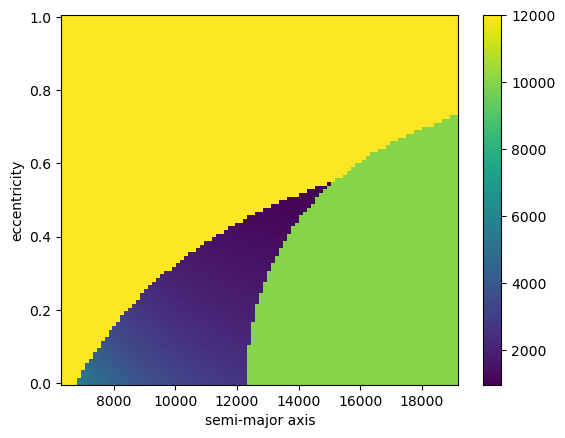

In [16]:
plt.pcolor(A, E, Ang)
plt.colorbar()
plt.xlabel("semi-major axis")
plt.ylabel("eccentricity")
indx = np.unravel_index(Ang.argmin(), Ang.shape)
print(indx)
print(round(A[indx],2), round(E[indx],4), round(inc(A[indx], E[indx]),2))
print(np.min(Ang))

(54, 67)
14994.37 0.5455 167.07
952.609995397303


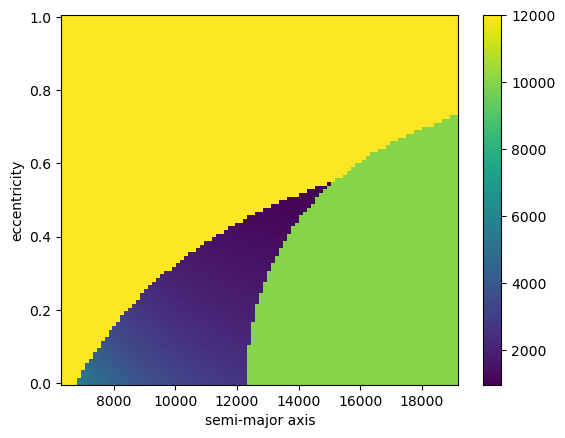

In [17]:
plt.pcolor(A, E, Ang)
plt.colorbar()
plt.xlabel("semi-major axis")
plt.ylabel("eccentricity")
indx = np.unravel_index(Ang.argmin(), Ang.shape)
print(indx)
print(round(A[indx],2), round(E[indx],4), round(inc(A[indx], E[indx]),2))
print(np.min(Ang))

In [18]:
Ang[0,0]

12000.0